<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 경사 하강법
Stochastic Gradient Descent(확률적) -> 하나의 샘플

Minibatch -> 여러 개의 샘플

batch -> 모든 샘플

샘플 사용해서 경사 내려감.
손실 함수가 적어지도록

훈련 세트 모두 사용시 1에포크 완료


이진 분류 -> 로지스틱 손실 함수(이진 크로스엔트로피 함수,로그 기반)

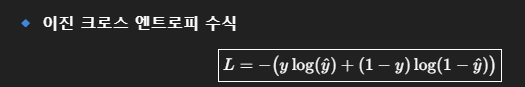
| 상황         | 손실   |
| ---------- | ---- |
| 정답=1, 확률≈1 | 거의 0 |
| 정답=1, 확률≈0 | 매우 큼 |
| 정답=0, 확률≈0 | 거의 0 |
| 정답=0, 확률≈1 | 매우 큼 |


다중 분류 -> 크로스 엔트로피 함수

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.773109243697479
0.775

0.7983193277310925
0.775



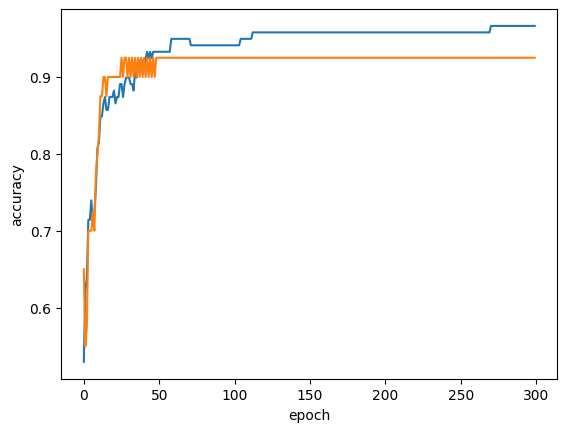

0.957983193277311
0.925


In [10]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target=fish['Species']

train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

# 확률적 경사하강법 제공 클래스
from sklearn.linear_model import SGDClassifier
#loss=손실함수 지정 log_loss(크로스 엔트로피), max_iter=에포크 수 지정, early_stopping=True -> 성능 나빠지면 멈춤
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
# max_iter가 낮아서 정확도 낮음
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print()

# partial_fit을 통해 추가 학습 가능(이어서)
# 앞과 같은 손실 함수, 정책으로(기존w,b가지고) (epoch 한번 더 돌린 기능)
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

print()

# early stopping예제
#300번 진행하면서 train,test정확도를 기록해놓고 그래프화
sc=SGDClassifier(loss='log_loss', random_state=42)
train_score =[]
test_score =[]
#모델에 클래스 종류 넘겨주기 위해
classes=np.unique(train_target)
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 앞 그래프 분석결과 epoch 100이 가장 나음 그래서 100으로 훈련 시작
# tol=None -> 자동으로 멈추지 않고 무조건 100번 반복시킴
sc=SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))